# Quels services et quelles démarches ?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

In [2]:
data = pd.read_csv("../dgfip/data/coordonnees-des-structures-dgfip.csv", sep=";")

# Les services de chaque structure

In [3]:
service_values = list(set(data["service"].values))

In [4]:
all_services = []
for a in service_values:
    all_services = all_services + a.split(";")
    
all_services = list(set(all_services))
all_services

['Obtenir un renseignement, effectuer une démarche',
 'Payer mes impôts',
 'Payer mes factures d’hôpital',
 'Payer mes amendes',
 'Payer mes factures locales (cantine, crèche...)']

In [5]:
df_service = pd.DataFrame(columns=all_services)
for serv in all_services:
    df_service[serv] = data.service.str.contains(serv, regex=False)

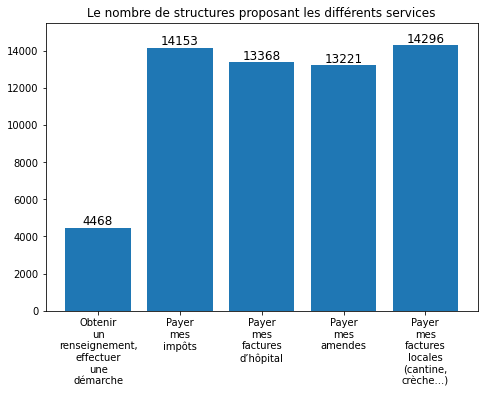

In [6]:
X = df_service.columns.str.replace(' ', '\n')
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X, df_service.sum().values)
for i, val in enumerate(df_service.sum().values):
    ax.annotate(val, xy=(i, val), ha='center', va='bottom', fontsize=12)
plt.ylim(0, 15500)
plt.title("Le nombre de structures proposant les différents services")
plt.show()

# Les démarches de chaque structure

In [7]:
demarche_values = list(set(data["Type de démarche"].values))

In [15]:
all_demarches = []
for a in demarche_values:
    all_demarches = all_demarches + a.replace(" >", "").replace("> ","").replace(">", "").split('\n')

all_demarches = list(set(all_demarches))
print("taille =", len(all_demarches))

taille = 47


In [19]:
all_demarches = ["amendes", "impôts", "factures locales", "réclamation", "paiements en ligne",
                 "information générale", "RDV", "entreprise", "hospitalières", 
                 "fichier immobilier", "foncière"]

In [20]:
df_demarche = pd.DataFrame(columns=all_demarches)
for demar in all_demarches:
    df_demarche[demar] = data['Type de démarche'].str.contains(demar, regex=False)

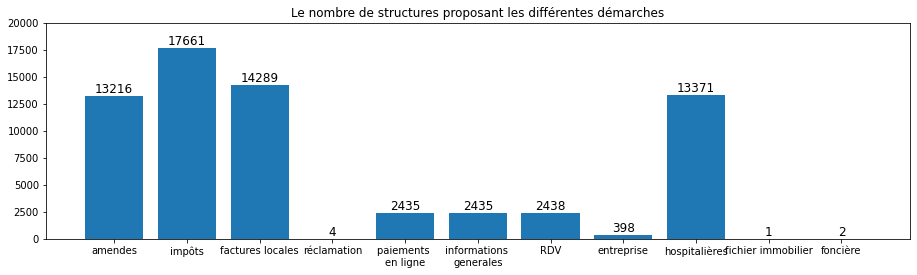

In [21]:
X = all_demarches
X[4] = "paiements \nen ligne"
X[5] = "informations \ngenerales"
fig = plt.figure(figsize=(12,3))
ax = fig.add_axes([0,0,1,1])
ax.bar(X, df_demarche.sum().values)
for i, val in enumerate(df_demarche.sum().values):
    ax.annotate(val, xy=(i, val), ha='center', va='bottom', fontsize=12)
plt.ylim(0, 20000)
plt.title("Le nombre de structures proposant les différentes démarches")
plt.show()

# Représentations graphiques 

In [12]:
df_service["Payer mes factures"] = df_service["Payer mes factures d’hôpital"] + \
                                   df_service["Payer mes factures locales (cantine, crèche...)"]
del df_service["Obtenir un renseignement, effectuer une démarche"]
del df_service["Payer mes factures d’hôpital"]
del df_service["Payer mes factures locales (cantine, crèche...)"]
df_service["nb de services"] = df_service.sum(axis=1)
df_service["DEPARTEMENT"] = data.DEPARTEMENT

In [13]:
dep = gpd.read_file('https://github.com/gregoiredavid/france-geojson/raw/master/departements-version-simplifiee.geojson', crs='4236')

Text(0.5, 1.0, "Qualité des centres en fonction du nb. de services qu'ils proposent")

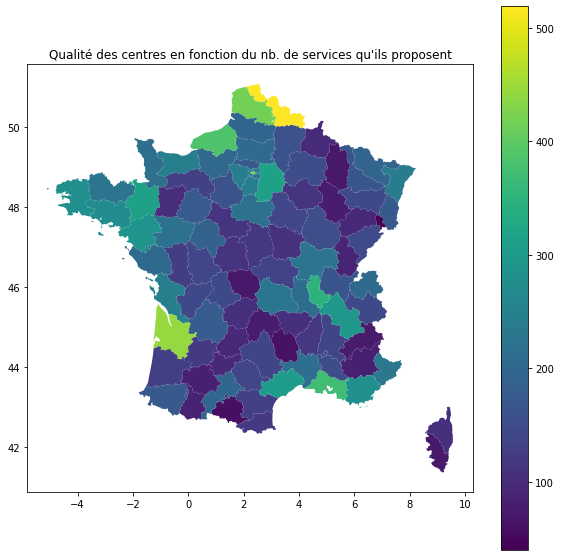

In [14]:
count = df_service[["DEPARTEMENT","nb de services"]].groupby('DEPARTEMENT', as_index=False).size()
ax = dep.merge(count, left_on = 'code', right_on = 'DEPARTEMENT').plot('size', legend=True, figsize=(10,10),)
ax.set_title("Qualité des centres en fonction du nb. de services qu'ils proposent")